In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import pandas_profiling 
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import train_test_split # train, test split
from sklearn.preprocessing import StandardScaler # normalization
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.svm import SVC # SVC model
from xgboost import XGBClassifier # XGBoost model
from sklearn.model_selection import GridSearchCV, cross_val_score # Gridsearch 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve# results

import warnings # ignore warning
warnings.filterwarnings("ignore")

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv("german_credit_data.csv", index_col = "Unnamed: 0")
df = data.copy()

Overview dos dados

In [5]:
df.head().style.background_gradient()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,nan,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,nan,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.shape

(1000, 10)

Descrição das variaveis :


| Variável          | Descrição                                                |
|-------------------|----------------------------------------------------------|
| Age               | Idade da pessoa que solicita o crédito.                  |
| Sex               | Gênero da pessoa que solicita o crédito.                 |
| Job               | Os valores especificados para o emprego na forma de 0,1,2,3. |
| Housing           | Própria, alugada ou gratuita.                            |
| Saving accounts   | A quantia de dinheiro na conta bancária da pessoa.       |
| Checking account  | Conta corrente.                                          |
| Credit amount     | Montante do crédito.                                     |
| Duration          | Tempo dado para pagamento do crédito.                    |
| Purpose           | Objetivo da solicitação de crédito.                      |
| Risk              | Solicitação de crédito positiva ou negativa.             |


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Resumo do INFO:

| Resumo                  |                         |
|-------------------------|-------------------------|
| Tipo dos dados          |                         |
| int64 (4)               | Age, Job, Credit amount, Duration |
| object (6)              | Sex, Housing, Saving accounts, Checking account, Purpose, Risk |
| Número de linhas        | 1000                    |
| Número de colunas       | 10                      |


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


Resumo estatistico dos valores númericos:

|     | Max   | Min   | Mean    |
|-----|-------|-------|---------|
| Age | 75.0  | 19.0  | 35.546  |
| Job | 3.0   | 0.0   | 1.904   |
| Credit amount | 18424.0 | 250.0 | 3271.258 |
| Duration | 72.0 | 4.0 | 20.903  |


In [14]:
columns = ["Age","Sex","Job","Housing","Saving accounts","Checking account","Credit amount","Duration","Purpose","Risk"]

def unique_value(data_set, column_name):
    return data_set[column_name].nunique()

print("Número de valores unicos:\n",unique_value(df, columns))    

Número de valores unicos:
 Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [15]:
# Tabela de valores nulos
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)

,Missing Values,% Value
Checking account,394,39
Saving accounts,183,18
Age,0,0
Sex,0,0
Job,0,0
Housing,0,0
Credit amount,0,0
Duration,0,0
Purpose,0,0
Risk,0,0


In [17]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("lightgreen", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


Sexo e proposito:

|            | Cars | Vacation/Others | Domestic Appliances |
|------------|------|-----------------|---------------------|
| Women (94) | 94   | 3               | 12                  |
| Men (243)  | 243  | 12              | 6                   |


# Data Visualization

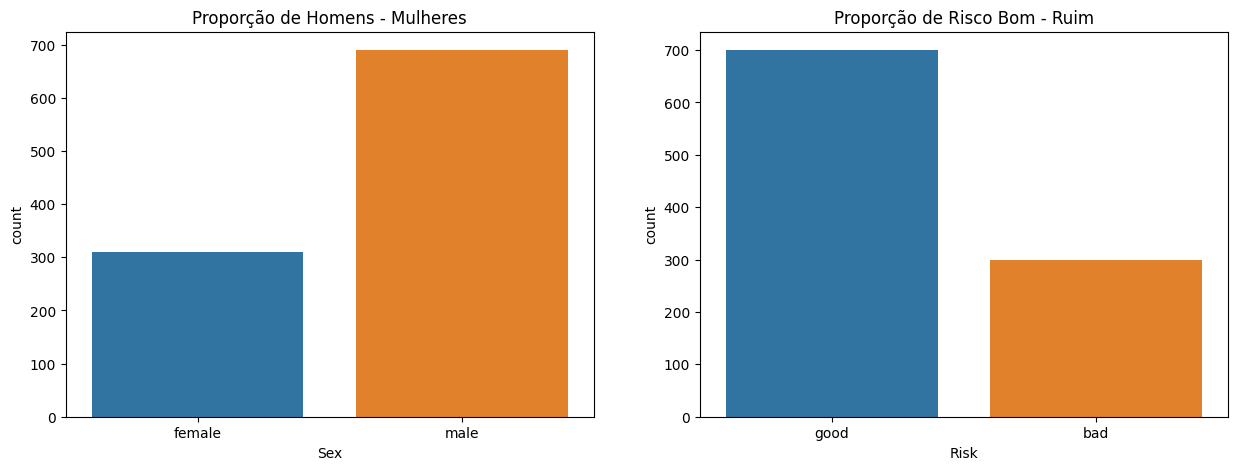

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo a coluna 'Sex' para tipo categórico
df['Sex'] = df['Sex'].astype('category')

# Criando o gráfico de contagem
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=df, x='Sex', ax=ax[0]).set_title('Proporção de Homens - Mulheres')
sns.countplot(data=df, x='Risk', ax=ax[1]).set_title('Proporção de Risco Bom - Ruim')
plt.show()


-Analisando os gráficos, a taxa de homens neste conjunto de dados é maior do que a taxa de mulheres.

-Analisando os gráficos, a taxa de risco bom neste conjunto de dados é maior do que a taxa de risco ruim.


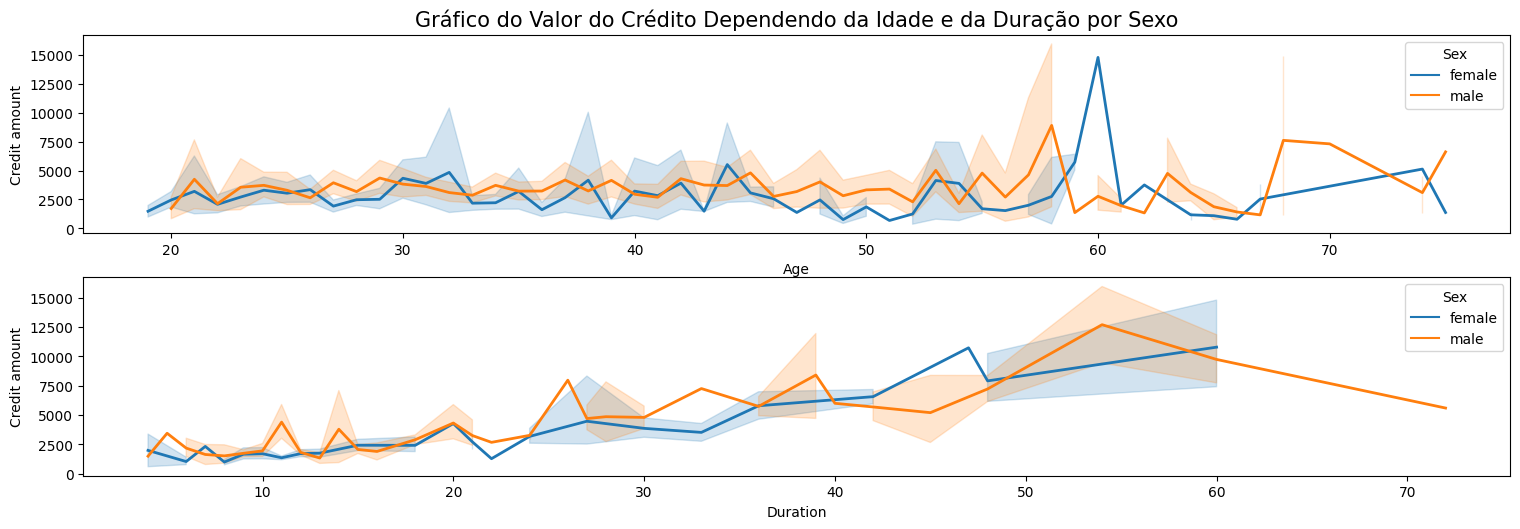

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(15, 5))
plt.tight_layout()  # Não é necessário passar argumentos para tight_layout()

sns.lineplot(data=df, x='Age', y='Credit amount', hue='Sex', lw=2, ax=ax[0]).set_title("Gráfico do Valor do Crédito Dependendo da Idade e da Duração por Sexo", fontsize=15)
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='Sex', lw=2, ax=ax[1])

plt.show()


Olhando para o gráfico, o maior valor de crédito foi alcançado aos 60 anos, mais ou menos.
    
Olhando para o gráfico, os maiores montantes de empréstimos foram alcançados entre 50-60 de duração.


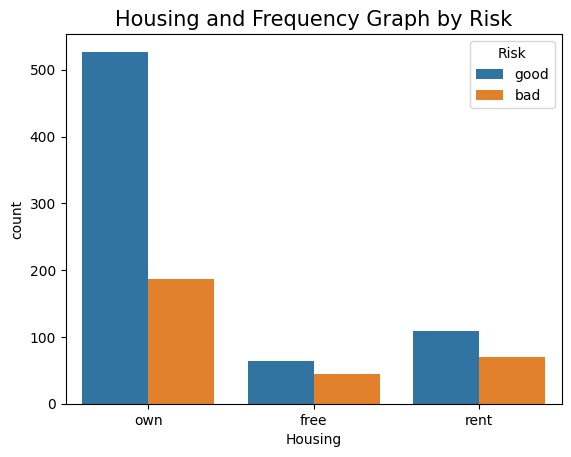

In [26]:
sns.countplot(x="Housing", hue="Risk", data=df).set_title("Housing and Frequency Graph by Risk", fontsize=15);
plt.show()

As taxas de risco são mais altas nas categorias de própria, livre e alugada do que risco ruim. 

Os proprietários de suas próprias casas são as pessoas que mais solicitam empréstimos.
